No. of elements in training set
24000
No. of elements in testing set
8000
16963    California's same-sex marriage ban ruled uncon...
31283    Sports-heavy broadcast day for BBC One receive...
22340    Report says disappearing life threatens biodiv...
24344    UN accuses US of wholesale rights violations i...
2219     5 Ridiculous Things Science Claimed About Bear...
Name: headline, dtype: object
16963    0
31283    0
22340    0
24344    0
2219     1
Name: clickbait, dtype: int64
31858                 Indian Ocean tsunami, one year after
20688    UN carries out first review of US human rights...
19125    Pirate Bay case: Internet group attacks websit...
13523             How Many Iconic '70s Films Have You Seen
3473        How Much Do You Really Know About "Doctor Who"
Name: headline, dtype: object
31858    0
20688    0
19125    0
13523    1
3473     1
Name: clickbait, dtype: int64


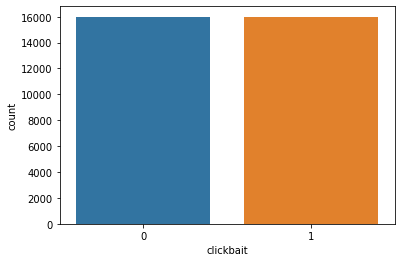

In [1]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string as s
import re

import matplotlib.pyplot as plt


import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import os
cb_data= pd.read_csv('clickbait_data.csv')
cb_data.head()
sns.countplot(x='clickbait',data=cb_data)
x=cb_data.headline
y=cb_data.clickbait
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=22,stratify=cb_data['clickbait'])
print("No. of elements in training set")
print(train_x.size)
print("No. of elements in testing set")
print(test_x.size)
print(train_x.head())
print(train_y.head())
print(test_x.head())
print(test_y.head())



In [2]:
def tokenization(text):
    lst=text.split()
    return lst
train_x=train_x.apply(tokenization)
test_x=test_x.apply(tokenization)

In [3]:
def lowercasing(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)  

In [17]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords)  

In [5]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations)
test_x=test_x.apply(remove_punctuations)  

In [6]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

In [7]:
def remove_spaces(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_spaces)
test_x=test_x.apply(remove_spaces)

In [8]:
train_x.head()
test_x.head()

31858                  [indian, ocean, tsunami, one, year]
20688    [un, carries, first, review, us, human, rights...
19125    [pirate, bay, case, internet, group, attacks, ...
13523                       [many, iconic, s, films, seen]
3473                     [much, really, know, doctor, who]
Name: headline, dtype: object

In [9]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [10]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' ' for i in x))

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cov=CountVectorizer(analyzer='word', ngram_range=(1,2),max_features=22500)
train_1=cov.fit_transform(train_x)
test_1=cov.transform(test_x)

In [12]:

train_arr=train_1.toarray()
test_arr=test_1.toarray()

pd.DataFrame(test_arr[:100], columns=cov.get_feature_names())


c:\users\sudhi\opencv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaron,aaron tveit,ab,abandon,abandoned,abbas,abbey,abbott,abby,...,zombie apocalypse,zone,zoo,zoolander,zotob,zotob worm,zuma,zurich,íngrid,íngrid betancourt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:


NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)



In [14]:
from sklearn.metrics import f1_score,accuracy_score
print("F1 score of the model")
print(f1_score(test_y,pred))
print("Accuracy of the model")
print(accuracy_score(test_y,pred))
print("Accuracy of the model in percentage")
print(accuracy_score(test_y,pred)*100,"%")

F1 score of the model
0.9593110334498253
Accuracy of the model
0.95925
Accuracy of the model in percentage
95.92500000000001 %


In [15]:


from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(test_y,pred))

from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(test_y,pred))



Confusion Matrix
[[3831  169]
 [ 157 3843]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4000
           1       0.96      0.96      0.96      4000

    accuracy                           0.96      8000
   macro avg       0.96      0.96      0.96      8000
weighted avg       0.96      0.96      0.96      8000

